In [ ]:
# Si hizo una instalación local, puede omitir esta celda
!pip install qiskit

In [ ]:
# Si hizo una instalación local, puede omitir esta celda
!pip install pylatexenc

In [3]:

from qiskit.visualization import plot_histogram

In [ ]:
# Si hizo una instalación local, puede omitir esta celda
!pip install qiskit-aer

from qiskit_aer import AerSimulator
backend =  AerSimulator(method='statevector')

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

## Dos qubits

### Operaciones básicas

Podemos aplicar operaciones a cada qubit por separado. Por ejemplo, el circuit mostrado aplica la operación $(\hat X\otimes\hat I)(|0\rangle \otimes|0\rangle)=\hat X|0\rangle\otimes\hat I|0\rangle=|1\rangle\otimes|0\rangle=|10\rangle$

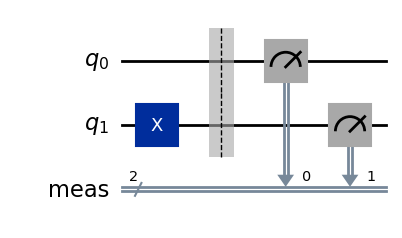

In [6]:
dos_qubits = QuantumCircuit(2)
dos_qubits.x(1)
dos_qubits.measure_all()
dos_qubits.draw('mpl')

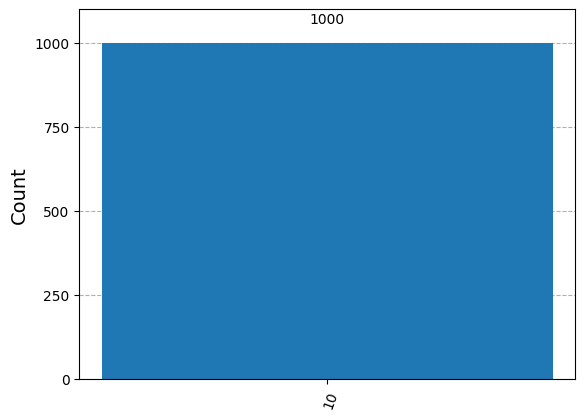

In [7]:
job = backend.run(dos_qubits,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

##### Ejercicio 0

¿Cuál es la salida del siguiente circuito?

Verifique su respuesta, hasta una fase local, usando el simulador.

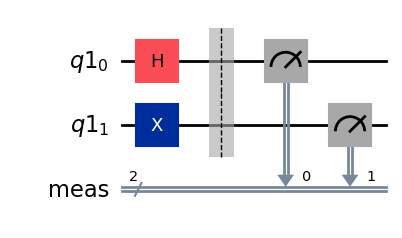

In [8]:
qr = QuantumRegister(2)
dos_qubits = QuantumCircuit(qr)
dos_qubits.h(0)
dos_qubits.x(1)
dos_qubits.measure_all()
dos_qubits.draw('mpl')

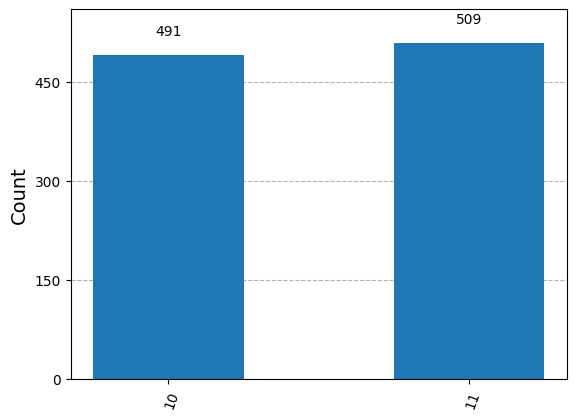

In [9]:
job = backend.run(dos_qubits,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

### Algunas compuertas importantes

#### Compuerta CNOT

$\bullet$ Compuerta CNOT: Esta compuerta requiere de dos qubits, uno llamado *control* y otro llamado *objetivo*. En la figura, el qubit $|x\rangle$ es el control y el qubit $|y\rangle$ es el objetivo. Formalmente, la operación CNOT corresponde a


$$CNOT(|x\rangle\otimes|y\rangle)=|x\rangle\otimes|y\oplus x\rangle.$$

En forma de operador,

$$CNOT = \hat I\otimes|0\rangle\langle0|+\hat X\otimes|1\rangle\langle1|.$$

**Cuidado: tal y como lo hemos escrito, el control es el qubit en la posición menos siginficativa. Es decir, el control es el qubit más a la derecha, al momento de operar.**

$\star$ Si $|x\rangle=|0\rangle$, $|y\rangle$ no cambia.

$\star$ Si $|x\rangle=|1\rangle$, $|y\rangle$ cambia su valor.

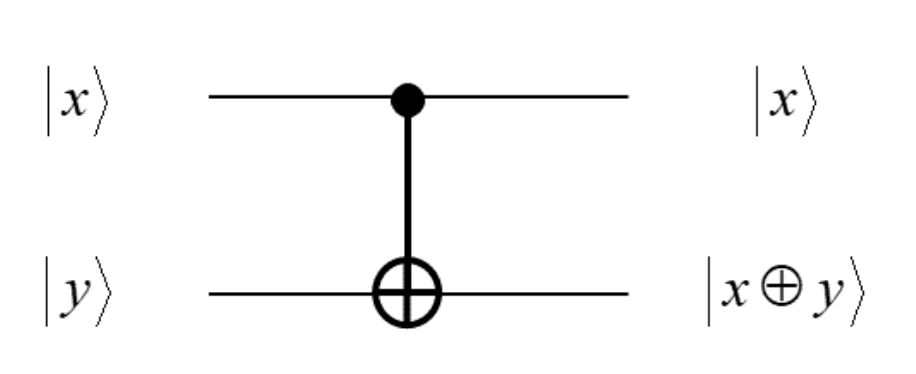



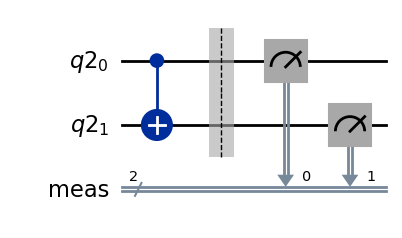

In [11]:
# Inicializamos un circuito con dos qubits
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)


# Añadimos la compuerta CNOT al circuito.
# El primero argumento indica cuál qubit es el control,
# el segundo indica cuál qubit es el objetivo
qc.cx(0,1)



qc.measure_all()

qc.draw('mpl')

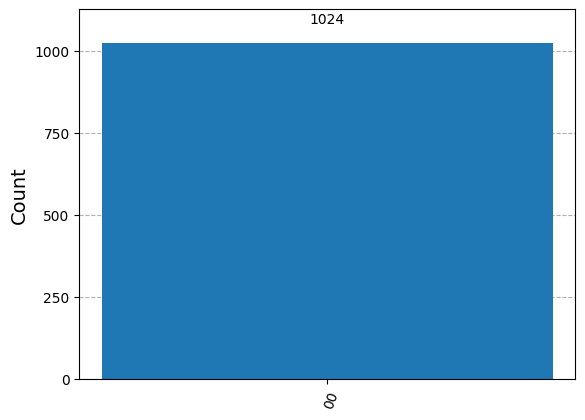

In [12]:
job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

##### Ejercicio 1:

¿Qué sucede al aplicar la compuerta CNOT si el qubit de control se inicializa en el estado $|+\rangle$ y el objetivo en el estado $|-\rangle$? Usando qiskit, verifique su respuesta.

Si lo desea, puede usar la plataforma de ibm quantum para construir su circuito.



##### Ejercicio 2

De forma análoga a la compuerta CNOT, existe la compuerta CZ (controlled-Z), que cambia la fase de un qubit, si el control está en el estado $|1\rangle$.

$$CZ = \hat I\otimes|0\rangle\langle0|+\hat Z\otimes|1\rangle\langle1|.$$

$\bullet$ Muestre que la compuerta CZ se puede simular como

$$\hat Z = (\hat H\otimes\hat I)(CNOT)(\hat H\otimes\hat I)$$

$\bullet$ Construya y simule el circuito correspondiente.

$\bullet$ Verifique su respuesta, para el control en el estado $|1\rangle$ y el objetivo en el estado $|+\rangle.$

**Cuidado: tal y como lo hemos escrito, el control es el qubit en la posición menos siginficativa. Es decir, el control es el qubit más a la derecha, al momento de operar.**

##### Ejercicio 3

Considere el siguiente circuito, que implementa al operador unitario $\hat U$

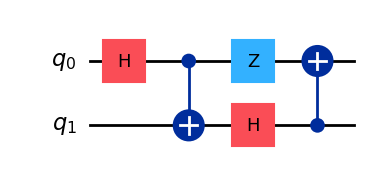

In [13]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.h(1)
qc.cx(1,0)

qc.draw('mpl')

$\bullet$ Construya un circuito correspondiente a la operación $\hat U^{-1}$. Verifique su solución si el estado incial es el estado $|00\rangle$. *Hint: ¿cómo son los operadores en el cómputo cuántico?*

#### Compuerta SWAP

La compuerta SWAP intercambia a los qubits:

$|a\rangle\otimes|b\rangle\overbrace{\longrightarrow}^{SWAP}|b\rangle\otimes|a\rangle$.

Su representación en términos de la base de número es

$$SWAP=|00\rangle\langle00|+|11\rangle\langle11|+|01\rangle\langle10|+|10\rangle\langle01|.$$

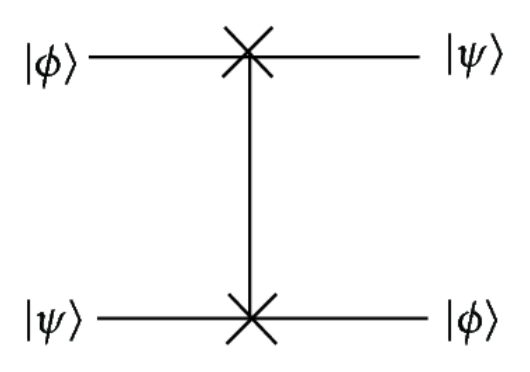


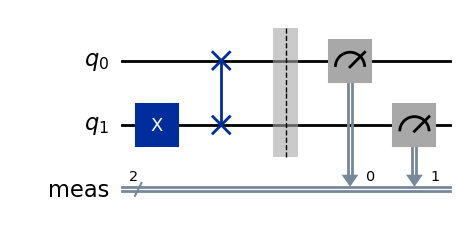

In [14]:
qc = QuantumCircuit(2)

qc.x(1)
qc.swap(0,1)
qc.measure_all()
qc.draw('mpl')

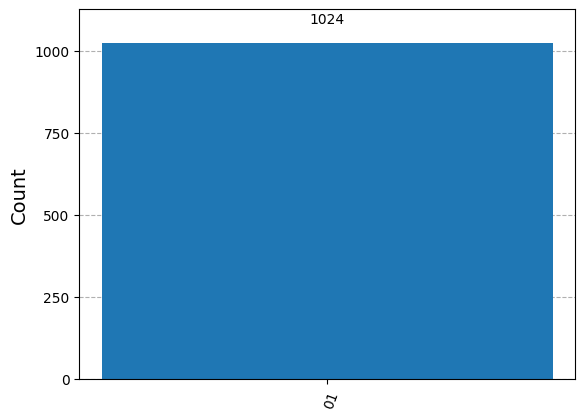

In [15]:
job = backend.run(qc,shots=1024)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

##### Ejercicio 4

$\bullet$ Diseñe un circuito que simule la acción de la compuerta SWAP a partir de tres compuertas CNOT. Explique por qué su circuito funciona.

## El circuito de Bell

El siguiente circuito genera el estado de bell $$|\Phi^+\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$ visto en clase.

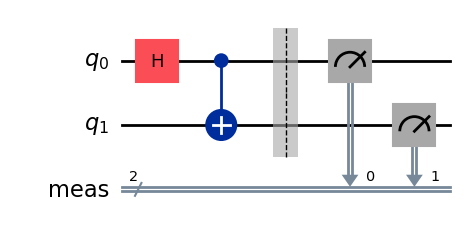

In [16]:
circuito_bell = QuantumCircuit(2)
circuito_bell.h(0)
circuito_bell.cx(0,1)                #cx: controlled x
circuito_bell.measure_all()

circuito_bell.draw('mpl')

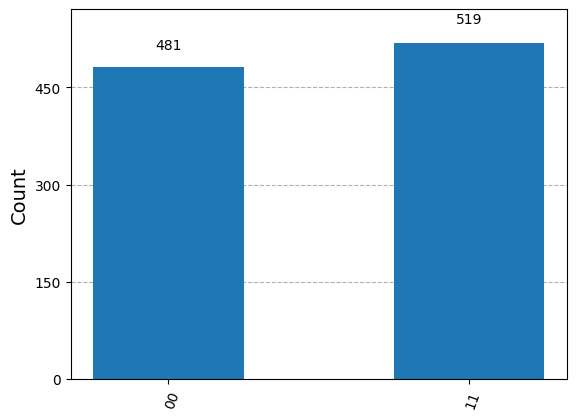

In [17]:
job = backend.run(circuito_bell,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

##### Ejercicio 6

Diseñe tres circuitos para generar los estados de Bell:

>(a) $|\Phi^-\rangle=\tfrac{1}{\sqrt{2}}(|00\rangle-|11\rangle)$

>(b) $|\Psi^+\rangle=\tfrac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$

>(c) $|\Psi^-\rangle=\tfrac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$